In [44]:
import numpy as np
import pandas as pd 
import requests
import xlsxwriter
import math
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame 
%matplotlib inline

In [45]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [46]:
load_dotenv()
api_key = os.getenv('ALPACA_API_KEY')
api_secret = os.getenv('ALPACA_SECRET_KEY')

In [47]:
base_url = 'https://paper-api.alpaca.markets'

api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

account = api.get_account()





# Create the Alpaca API object
# YOUR CODE HERE!
ETH_price = api.get_crypto_bars('ETHUSD',  TimeFrame.Day, "2010-06-08", "2022-08-21")
ETH_df = spy_price.df

ETH_df.tail()

,exchange,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2022-08-20 05:00:00+00:00,ERSX,1635.81,1649.62,1527.15,1589.94,303.359683,237,1585.198199
2022-08-20 05:00:00+00:00,FTXU,1648.20,1656.50,1524.20,1583.40,88148.353000,39523,1592.622357
2022-08-21 05:00:00+00:00,CBSE,1583.30,1646.69,1562.27,1607.59,402854.147811,945282,1611.916031
2022-08-21 05:00:00+00:00,ERSX,1580.00,1639.13,1528.00,1606.94,374.913221,155,1608.079824
2022-08-21 05:00:00+00:00,FTXU,1583.40,1646.60,1563.40,1607.80,73192.668000,36672,1610.898730


In [48]:
ETH_df = ETH_df.drop(columns=["open","high","low","volume","trade_count","vwap"])


In [49]:
ETH_df


,exchange,close
timestamp,,
2016-05-17 05:00:00+00:00,CBSE,14.00
2016-05-18 05:00:00+00:00,CBSE,13.18
2016-05-19 05:00:00+00:00,CBSE,14.82
2016-05-20 05:00:00+00:00,CBSE,14.17
2016-05-23 05:00:00+00:00,CBSE,13.74
...,...,...
2022-08-20 05:00:00+00:00,ERSX,1589.94
2022-08-20 05:00:00+00:00,FTXU,1583.40
2022-08-21 05:00:00+00:00,CBSE,1607.59


In [50]:
ETH_df["Actual Returns"] = ETH_df["close"].pct_change()

In [51]:
ETH_df = spy_df.dropna()

In [52]:
ETH_df

,exchange,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
timestamp,,,,,,,
2016-08-28 05:00:00+00:00,CBSE,11.01,-0.010782,11.1925,12.6242,-1.0,0.010782
2016-08-29 05:00:00+00:00,CBSE,10.97,-0.003633,11.0975,12.5857,-1.0,0.003633
2016-08-30 05:00:00+00:00,CBSE,11.16,0.017320,11.0675,12.5556,1.0,-0.017320
2016-08-31 05:00:00+00:00,CBSE,12.05,0.079749,11.2975,12.5387,1.0,0.079749
2016-09-01 05:00:00+00:00,CBSE,12.05,0.000000,11.5575,12.5298,1.0,0.000000
...,...,...,...,...,...,...,...
2022-08-20 05:00:00+00:00,ERSX,1589.94,0.004194,1616.2000,1697.8262,1.0,-0.004194
2022-08-20 05:00:00+00:00,FTXU,1583.40,-0.004113,1601.3100,1698.4910,-1.0,-0.004113
2022-08-21 05:00:00+00:00,CBSE,1607.59,0.015277,1591.0575,1699.3679,1.0,-0.015277


In [53]:
short_window = 4
long_window = 100

ETH_df['SMA_Fast'] = ETH_df.loc[:, ["close"]].rolling(window=short_window).mean()
ETH_df['SMA_Slow'] = ETH_df.loc[:, ["close"]].rolling(window=long_window).mean()

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [54]:
ETH_df = spy_df.dropna()

In [55]:
ETH_df

,exchange,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
timestamp,,,,,,,
2016-08-28 05:00:00+00:00,CBSE,11.01,-0.010782,11.1925,12.6242,-1.0,0.010782
2016-08-29 05:00:00+00:00,CBSE,10.97,-0.003633,11.0975,12.5857,-1.0,0.003633
2016-08-30 05:00:00+00:00,CBSE,11.16,0.017320,11.0675,12.5556,1.0,-0.017320
2016-08-31 05:00:00+00:00,CBSE,12.05,0.079749,11.2975,12.5387,1.0,0.079749
2016-09-01 05:00:00+00:00,CBSE,12.05,0.000000,11.5575,12.5298,1.0,0.000000
...,...,...,...,...,...,...,...
2022-08-20 05:00:00+00:00,ERSX,1589.94,0.004194,1616.2000,1697.8262,1.0,-0.004194
2022-08-20 05:00:00+00:00,FTXU,1583.40,-0.004113,1601.3100,1698.4910,-1.0,-0.004113
2022-08-21 05:00:00+00:00,CBSE,1607.59,0.015277,1591.0575,1699.3679,1.0,-0.015277


In [56]:
ETH_df["Signal"] = 0.0


ETH_df.loc[(ETH_df["Actual Returns"] >= 0), 'Signal'] = 1
ETH_df.loc[(ETH_df["Actual Returns"] < 0), 'Signal'] = -1

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [57]:
ETH_df

,exchange,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
timestamp,,,,,,,
2016-08-28 05:00:00+00:00,CBSE,11.01,-0.010782,11.1925,12.6242,-1.0,0.010782
2016-08-29 05:00:00+00:00,CBSE,10.97,-0.003633,11.0975,12.5857,-1.0,0.003633
2016-08-30 05:00:00+00:00,CBSE,11.16,0.017320,11.0675,12.5556,1.0,-0.017320
2016-08-31 05:00:00+00:00,CBSE,12.05,0.079749,11.2975,12.5387,1.0,0.079749
2016-09-01 05:00:00+00:00,CBSE,12.05,0.000000,11.5575,12.5298,1.0,0.000000
...,...,...,...,...,...,...,...
2022-08-20 05:00:00+00:00,ERSX,1589.94,0.004194,1616.2000,1697.8262,1.0,-0.004194
2022-08-20 05:00:00+00:00,FTXU,1583.40,-0.004113,1601.3100,1698.4910,-1.0,-0.004113
2022-08-21 05:00:00+00:00,CBSE,1607.59,0.015277,1591.0575,1699.3679,1.0,-0.015277


In [58]:
ETH_df['Strategy Returns'] = ETH_df['Actual Returns'] * ETH_df['Signal'].shift()

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
ETH_df

,exchange,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
timestamp,,,,,,,
2016-08-28 05:00:00+00:00,CBSE,11.01,-0.010782,11.1925,12.6242,-1.0,NaN
2016-08-29 05:00:00+00:00,CBSE,10.97,-0.003633,11.0975,12.5857,-1.0,0.003633
2016-08-30 05:00:00+00:00,CBSE,11.16,0.017320,11.0675,12.5556,1.0,-0.017320
2016-08-31 05:00:00+00:00,CBSE,12.05,0.079749,11.2975,12.5387,1.0,0.079749
2016-09-01 05:00:00+00:00,CBSE,12.05,0.000000,11.5575,12.5298,1.0,0.000000
...,...,...,...,...,...,...,...
2022-08-20 05:00:00+00:00,ERSX,1589.94,0.004194,1616.2000,1697.8262,1.0,-0.004194
2022-08-20 05:00:00+00:00,FTXU,1583.40,-0.004113,1601.3100,1698.4910,-1.0,-0.004113
2022-08-21 05:00:00+00:00,CBSE,1607.59,0.015277,1591.0575,1699.3679,1.0,-0.015277


<AxesSubplot:xlabel='timestamp'>

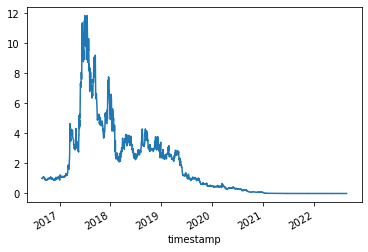

In [60]:
(1 + ETH_df['Strategy Returns']).cumprod().plot()

In [61]:
X = ETH_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

In [62]:
y = ETH_df['Signal']

In [63]:
training_begin = X.index.min()
print(training_begin)

2016-08-29 05:00:00+00:00


In [64]:
training_end = X.index.min() + DateOffset(months=24)
print(training_end)

2018-08-29 05:00:00+00:00


In [65]:
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]


In [66]:
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]


In [67]:
scaler = StandardScaler()


X_scaler = scaler.fit(X_train)


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [68]:
svm_model =svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [69]:
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.50      0.59      0.54      1302
         1.0       0.51      0.42      0.46      1314

    accuracy                           0.51      2616
   macro avg       0.51      0.51      0.50      2616
weighted avg       0.51      0.51      0.50      2616

